In [71]:
#cargamos el data set
import pandas as pd
ds = pd.read_csv('twitter_gender_50k.csv', sep='\n', names= ["text"])
ds.shape

(400000, 1)

In [38]:
ds['text'][0]

'1,one person followed me and 2 people unfollowed me \\/\\/ automatically checked by https:\\/\\/t.co\\/qsyIbIajjh'

In [39]:
tweet = []
for i in ds['text']:
    tweet.append(i[2:])

male_female = []
for i in ds['text']:
    male_female.append(i[:1])
    
data = pd.DataFrame(
    {'male_female': male_female,
     'tweet': tweet,
    })
##data

In [40]:
data.shape

(400000, 2)

In [5]:
data.head()

,male_female,tweet
0,1,one person followed me and 2 people unfollowed...
1,1,BABY https:\/\/t.co\/r0R86TBLIF
2,1,#FairMediaReportingForJaDine Jadines For JaDin...
3,1,Grade 2 learning about erosion https:\/\/t.co\...
4,1,@UnbridledShrewd Hello Klaus. *She said leanin...


In [6]:
import numpy as np
documents = np.asarray(data['tweet'])
documents

array([ 'one person followed me and 2 people unfollowed me \\/\\/ automatically checked by https:\\/\\/t.co\\/qsyIbIajjh',
       'BABY https:\\/\\/t.co\\/r0R86TBLIF',
       "#FairMediaReportingForJaDine Jadines For JaDine If you're no good at all in your job",
       ...,
       '#branding this should surely interest you https:\\/\\/t.co\\/OaQVtle8Az https:\\/\\/t.co\\/Jfz1hzY5z5',
       'Never be afraid to fail. https:\\/\\/t.co\\/dtC0jYzo3v https:\\/\\/t.co\\/9ErrXM61i8',
       '@paulhenson19 @jonmachota Yep. Apples and oranges.'], dtype=object)

In [ ]:
import re
### Limpiamos la data
doc_clear_processed = []
for item in documents:
    newitem = re.sub("@[A-Za-z0-9_]+",'',item) 
    newitem = re.sub("#[A-Za-z0-9_]+",'',newitem) 
    newitem = re.sub('\\\\','',newitem)
    newitem = re.sub("https://[A-Za-z0-9-//.]+",'',newitem)
    newitem = re.sub("[.,_-]+",' ',newitem)
    newitem = re.sub("[^A-Za-z0-9]+$",'',newitem)
    newitem = re.sub("^[^A-Za-z0-9]+",'',newitem)
    newitem = re.sub("[\$*&!?///\º\'\’\‘\|()%/\"{}@;:+\[\]\–\”\…\“\】\【=]",'',newitem)
    newitem = re.sub("[ ]+",' ',newitem)
    doc_clear_processed.append(newitem)
#exportamos a un archivo de textto para mayor visualizacion
with open("file.txt", "w",encoding='utf-8') as output:
    for item in doc_clear_processed:
        print item, end='\n', file=output

In [15]:
### separamos los tweets en tokens
tokens = []
for d in doc_clear_processed:
    tokens.extend(d.split())
len(tokens)

4446977

In [16]:
from collections import Counter
count_t = Counter(tokens)

In [17]:
len(count_t)

173508

In [18]:
###las palabras mas repetida
count_t.most_common(15)

[('the', 110580),
 ('to', 100262),
 ('a', 88536),
 ('I', 81264),
 ('and', 62110),
 ('you', 55382),
 ('in', 54751),
 ('of', 54343),
 ('for', 50486),
 ('is', 48090),
 ('on', 35774),
 ('my', 31036),
 ('it', 29726),
 ('me', 29646),
 ('with', 27539)]

### Pre-procesamiento

In [19]:
import re
import nltk
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [86]:
doc_preprocessed = []
doc_tokens = []
for d in doc_clear_processed:
    d = d.lower()
    doc_preprocessed.append(d)
    t = nltk.word_tokenize(d)
    doc_tokens.append(t)

In [87]:
doc_preprocessed[951]

'inside graceland nancy rooks if you wanted a picture of the life of elvis presley who better to paint it for'

In [88]:
doc_tokens[951]

['inside',
 'graceland',
 'nancy',
 'rooks',
 'if',
 'you',
 'wanted',
 'a',
 'picture',
 'of',
 'the',
 'life',
 'of',
 'elvis',
 'presley',
 'who',
 'better',
 'to',
 'paint',
 'it',
 'for']

In [89]:
##Procesamos los stopword
from nltk.corpus import stopwords
stopwords.words('english')

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 'her',
 'hers',
 'herself',
 'it',
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each',
 'few',
 'more',
 'most',
 'other',
 'some',
 'such',
 'no',
 'nor',
 '

In [90]:
#remover los stopwords de cada elemento
stopWords = set(stopwords.words('english'))
doc_nostopwords = []
sinRemover = 0
for item in doc_tokens:
    temp = []
    for word in item:
        if word not in stopWords:
            temp.append(word)
        else:
            sinRemover = sinRemover +1
    doc_nostopwords.append(temp)

In [91]:
doc_nostopwords[951]

['inside',
 'graceland',
 'nancy',
 'rooks',
 'wanted',
 'picture',
 'life',
 'elvis',
 'presley',
 'better',
 'paint']

# Lemmatizer

In [92]:
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()

In [94]:
import copy
data_lem = copy.deepcopy(doc_nostopwords)
#English
from nltk.stem.porter import *
ps = PorterStemmer()

doc_lemmatizer = []
for item in data_lem:
    temp = []
    for w in item:
        temp.append(lemmatizer.lemmatize(w))
    doc_lemmatizer.append(temp)
doc_lemmatizer[951]

['inside',
 'graceland',
 'nancy',
 'rook',
 'wanted',
 'picture',
 'life',
 'elvis',
 'presley',
 'better',
 'paint']

# Steamming

In [95]:
data_stem = copy.deepcopy(doc_nostopwords)
#English
from nltk.stem.porter import *
ps = PorterStemmer()

doc_stemmer = []
for item in data_stem:
    temp = []
    for w in item:
        temp.append(ps.stem(w))
    doc_stemmer.append(temp)
doc_stemmer[951]

['insid',
 'graceland',
 'nanci',
 'rook',
 'want',
 'pictur',
 'life',
 'elvi',
 'presley',
 'better',
 'paint']

# Vectores Característicos

In [96]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer

In [103]:
documents_lem = []
for item in doc_lemmatizer:
    documents_lem.append(' '.join(item))
documents_lem[951]

'inside graceland nancy rook wanted picture life elvis presley better paint'

In [106]:
documents_stem = []
for item in doc_stemmer:
    documents_stem.append(' '.join(item))
documents_stem[951]

'insid graceland nanci rook want pictur life elvi presley better paint'

In [108]:
#Con stem
tfidf = TfidfVectorizer()
X = tfidf.fit_transform(documents_stem)
X.shape

(400000, 100057)

In [109]:
#Con lem
tfidf = TfidfVectorizer()
X1 = tfidf.fit_transform(documents_lem)
X1.shape

(400000, 117819)

# Clasificacion

In [112]:
y = np.asarray(data.male_female.transpose())
y.shape

(400000,)

In [113]:
#Algoritmos de clasificacion 
from sklearn.model_selection import cross_val_score
from sklearn.svm import LinearSVC
from sklearn.linear_model import SGDClassifier
from sklearn.linear_model import Perceptron
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.naive_bayes import BernoulliNB, MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import NearestCentroid
from sklearn.ensemble import RandomForestClassifier

In [114]:
def run_model(clf, X, y):
    scores = cross_val_score(clf, X, y, cv=5)
    print("%s accuracy: %0.2f (+/- %0.2f)" % \
          (str(clf.__class__).split('.')[-1].replace('>','').replace("'",''), 
          scores.mean(), scores.std() * 2))

In [115]:
def run_models(X, y):
    run_model(LinearSVC(), X, y)
    run_model(SGDClassifier(), X, y)
    run_model(Perceptron(), X, y)
    run_model(PassiveAggressiveClassifier(), X, y)
    run_model(BernoulliNB(), X, y)
    run_model(MultinomialNB(), X, y)
    run_model(KNeighborsClassifier(), X, y)
    run_model(NearestCentroid(), X, y)
    run_model(RandomForestClassifier(n_estimators=100, max_depth=10), X, y)

In [ ]:
run_models(X, y)

LinearSVC accuracy: 0.63 (+/- 0.01)
SGDClassifier accuracy: 0.63 (+/- 0.01)
Perceptron accuracy: 0.57 (+/- 0.01)
PassiveAggressiveClassifier accuracy: 0.60 (+/- 0.02)
BernoulliNB accuracy: 0.63 (+/- 0.01)
MultinomialNB accuracy: 0.63 (+/- 0.01)


In [ ]:
run_models(X1, y)

# Exploración Visual

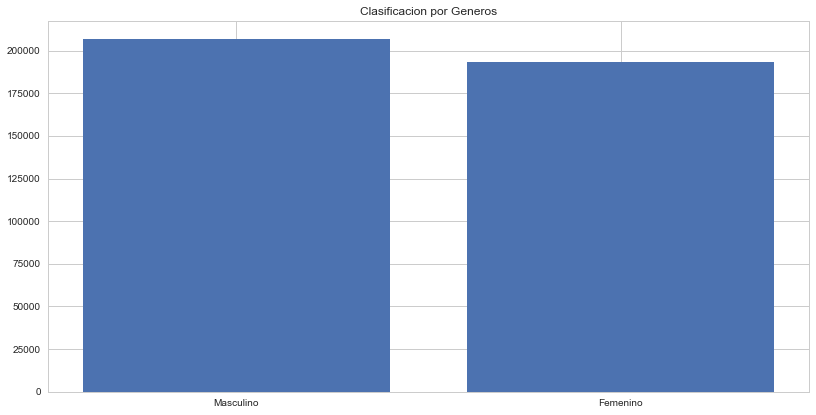

                          206901                                         193099


In [78]:
import matplotlib.pyplot as plt
#Masculino=1, Femenino=0
fig = plt.figure(figsize=(30, 15)) 
ax = plt.subplot2grid((2, 2), (0, 0))
generos =["Masculino","Femenino"]
ma,fe= 0,0
for i in range (len(ds)):
    if data['male_female'][i] == '1':
        ma=ma+1
    if data['male_female'][i] == '0':
        fe=fe+1
    
datos=[ma,fe]
xx = range(len(datos))

ax.bar(xx,datos)
ax.set_xticks(xx)
ax.set_xticklabels(generos)
plt.title("Clasificacion por Generos")

plt.show()
print '                         ',ma   , '                                       ',fe

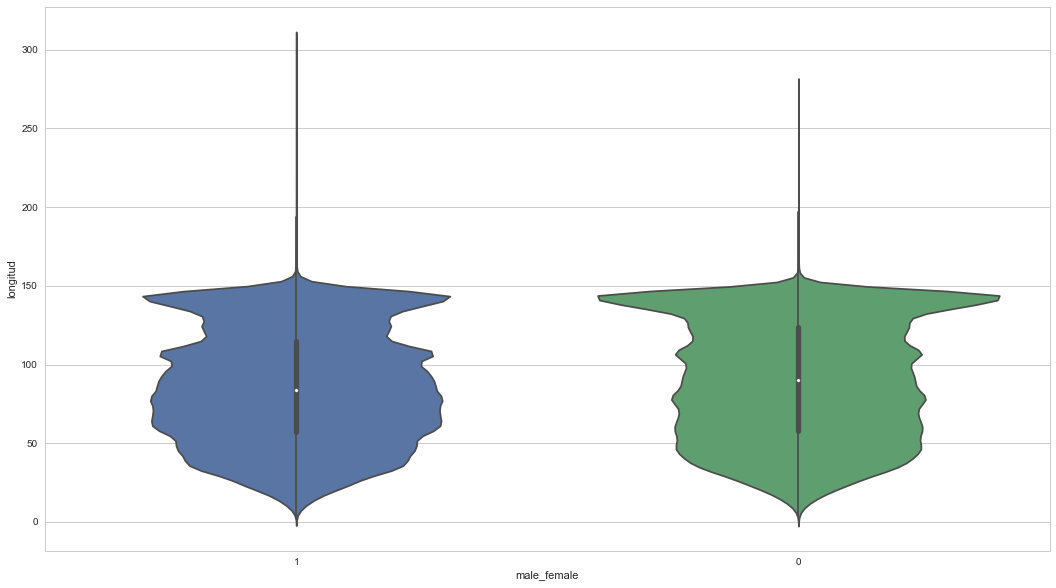

In [75]:
#Usando seaborn
#Gráfico de longitud de los tweets por cada género
#Masculino 1, Femenino 0
ds=data
ds['longitud'] = ds['tweet'].str.len()

genero="male_female"
melted_df = pd.melt(ds, 
                    id_vars=["male_female", "longitud"], 
                    var_name="tweet")
import seaborn as sns
sns.set_style('whitegrid')

sns.violinplot(x="male_female", y='longitud', data=ds,order=["1", "0"])
plt.rcParams['figure.figsize']=(18,10)
plt.show()